In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')

In [3]:
df = df.iloc[:,2:]

In [4]:
df.sample(5)

,Age,EstimatedSalary,Purchased
174,34,72000,0
242,50,88000,1
90,22,81000,0
265,42,108000,1
190,24,84000,0


Train TEST SPLIT

In [19]:
from sklearn.model_selection import train_test_split

X = df.drop('Purchased', axis=1)
y = df['Purchased']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((280, 2), (120, 2))

STANDARDSCALER

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [22]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

In [23]:
X_train.describe()

,Age,EstimatedSalary
count,280.000000,280.000000
mean,37.864286,69807.142857
std,10.218201,34641.201654
min,18.000000,15000.000000
25%,30.000000,43000.000000
50%,37.000000,70500.000000
75%,46.000000,88000.000000
max,60.000000,150000.000000


In [24]:
X_train_scaled.describe()

,Age,EstimatedSalary
count,2.800000e+02,2.800000e+02
mean,3.489272e-17,6.344132e-17
std,1.001791e+00,1.001791e+00
min,-1.947491e+00,-1.584970e+00
25%,-7.710131e-01,-7.752370e-01
50%,-8.473441e-02,2.003677e-02
75%,7.976239e-01,5.261201e-01
max,2.170181e+00,2.319101e+00


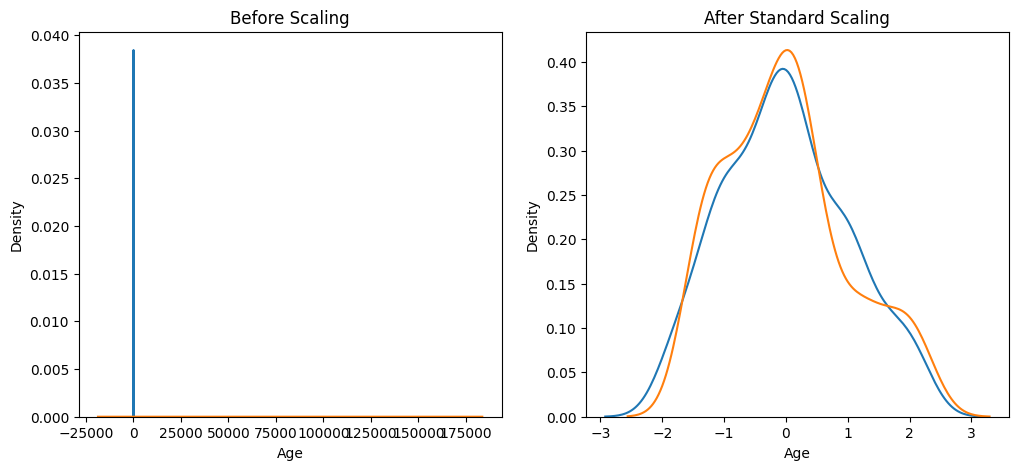

In [27]:
# plotting 
# before scaling
fig, (x1, x2) = plt.subplots(ncols=2, figsize=(12, 5))
x1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax=x1)
sns.kdeplot(X_train['EstimatedSalary'], ax=x1)

# after scaling
x2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=x2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=x2)
plt.show()

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [34]:
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [35]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [36]:
from sklearn.metrics import accuracy_score

In [37]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.875
Scaled 0.8666666666666667
